# **Comunicação e Redes - Centralidade**
---
Esse material aborda como alguns conceitos teóricos estudados na disciplina de Comunicação e Redes podem ser utilizados de forma prática com o uso da biblioteca NetworkX.

#### **Conceitos teóricos abordados:**
*   Centralidade e Importância de um Vértice
*   Centralidade de Grau
*   Centralidade de Proximidade
*   Centralidade de Betweenness
*   Centralidade de Autovetor
*   PageRank






## **Importação das bibliotecas NetworkX e Matplotlib**
---
A biblioteca NetworkX é um pacote em Python que visa a criação, manipulação e estudo de grafos e redes complexas. Essa biblioteca é muito utilizada em áreas como ciência da computação, análise de redes sociais, bioinformática, pesquisa operacional, entre outras. Já a biblioteca Matplotlib é uma das bibliotecas mais populares para visualização de dados em Python.

A importação das bibliotecas pode ser feita com os comandos:

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

## **Centralidade e Importância de um Vértice**
---

Ao estudar os vértices de um grafo e suas conexões, percebe-se que cada vértice possui sua **importância** na transmissão da informação. No entanto, não é difícil perceber que alguns vértices são mais importantes que os demais. Vértices que participam de pontes, por exemplo, costumam ter uma importância elevada, visto que se removidos acabam desconectando toda a rede.

A **centralidade** é uma medida fundamental em teoria dos grafos e análise de redes, usada para identificar os vértices mais importantes em uma rede. Como a importância de um vértice pode ser entendida de diferentes formas, existem diferentes tipos de centralidade, cada uma focando em um aspecto específico de importância.

A centralidade pode ser utilizada para identificar a influência de uma pessoa em uma rede social, para identificar a importância de um página web para ser apresentada em um mecanismo de busca, para identificar os pontos de maior importância em uma rede de transporte, e em muitas outras atividades. Identificar os vértices mais importantes do grafo pode ser vital para a estabilidade e o controle dessas redes.

Para que possamos estudar algumas das funções para determinação de centralidade de vértices oferecidas pela biblioteca NetworkX, vamos criar um grafo que represente a rede de transporte metroferroviário do estado de São Paulo exibida na imagem abaixo. Nesse grafo que vamos criar, os vértices representarão as estações e as arestas entre as estações irão significar um caminho existente entre elas.

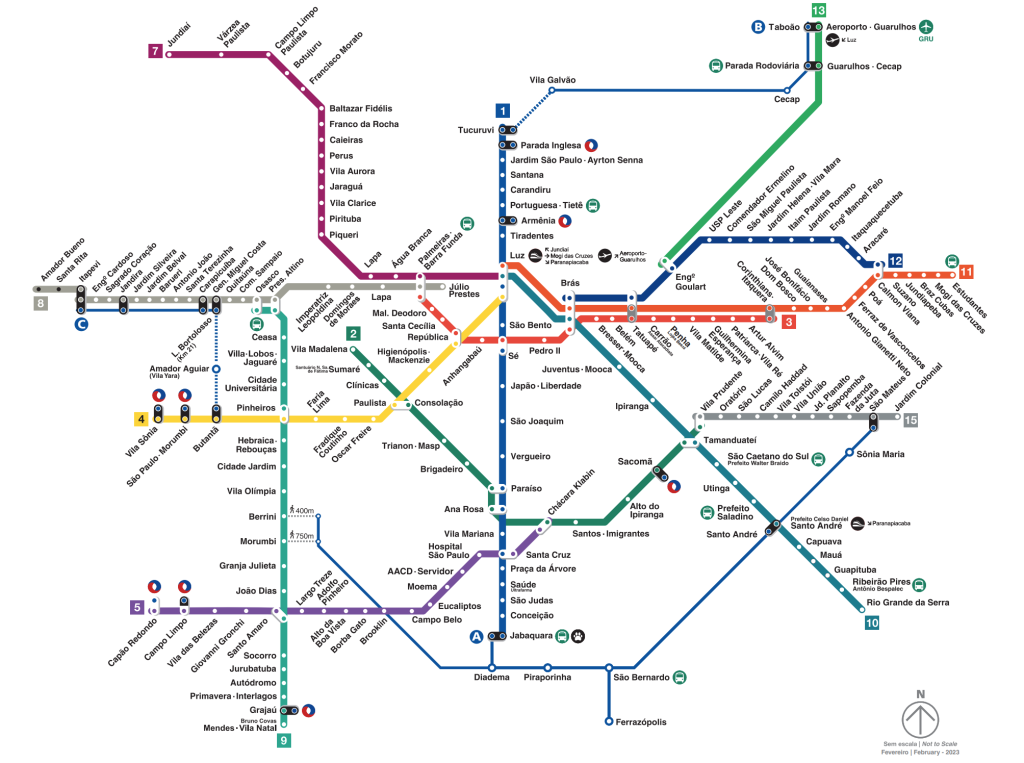



Dessa vez, vamos utilizar uma forma diferente para a criação do grafo. Vamos criá-lo a partir de uma lista de adjacência existente em um arquivo.txt. Para isso, vamos precisar importar o arquivo .txt para trabalhar com ele. O código abaixo mostra como isso é feito para a criação do grafo:

In [5]:
#Biblioteca que permite baixar arquivos diretamente do Google Drive.
import gdown

#ID do arquivo que queremos baixar
file_id = "10-n-Mf8jrGrvziAt3bnvXury_0JwHNEb"
download_url = f"https://drive.google.com/uc?id={file_id}"

#Baixar o arquivo para um local temporário (o arquivo baixado pode ser observado na pasta do menu à esquerda)
gdown.download(download_url, "adjacency_list.txt", quiet=False)

#Leitura do arquivo como lista de linhas
with open("adjacency_list.txt", "r") as f:
    lines = f.readlines()

#Criar o grafo a partir da lista de adjacência lida
#Cada linha é interpretada como a lista de adjacências do primeiro elemento dessa linha
G = nx.parse_adjlist(lines)



Downloading...
From: https://drive.google.com/uc?id=10-n-Mf8jrGrvziAt3bnvXury_0JwHNEb
To: /content/adjacency_list.txt
100%|██████████| 4.09k/4.09k [00:00<00:00, 5.73MB/s]


Com a criação do grafo que representa a rede metroferroviário de SP, podemos checar algumas informações iniciais antes de partirmos para o cálculo e análise dos diferentes tipos de centralidade.

In [6]:
#Número de estações existentes
print("Número de estações: "+ str(G.number_of_nodes()))
#Número de conexões entre estações
print("Número de conexões entre estações: "+ str(G.number_of_edges()))

Número de estações: 173
Número de conexões entre estações: 183


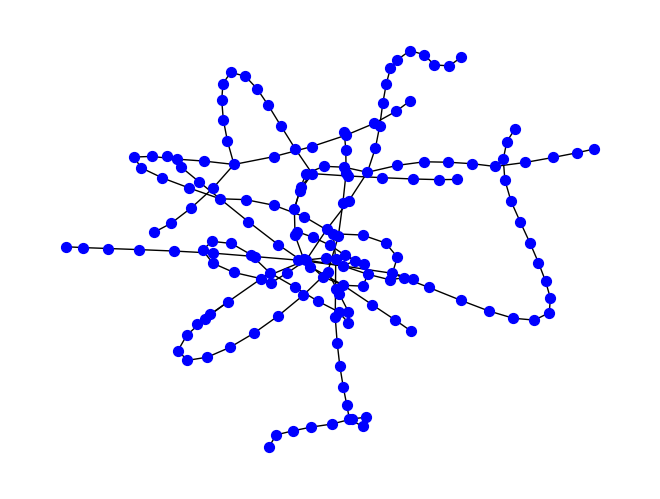

In [7]:
#Plot do grafo gerado para a rede metroferroviária
nx.draw(G, node_color='blue', node_size=50)

## **Centralidade de Grau**
---
Quando pensamos na importância de um vértice, a ideia mais simples e inicial é de que um vértice importante é aquele que está mais conectado com os demais vértices, ou seja, aquele que possui um maior grau.

A **centralidade de grau** trata justamente dessa ideia e mede o número de arestas conectadas a um vértice. O cálculo da centralidade de grau de um vértice X é feito com divisão do grau de X pelo grau máximo que X poderia ter (número total de nós - 1).

No contexto do grafo da rede metroferroviária, a centralidade de grau pode ser interpretada de forma que estações com maior centralidade provavelmente são as estações de transferência onde várias linhas se encontram. Essas estações são vitais para a conectividade do sistema de transporte e normalmente experimentam um volume maior de passageiros. Além disso, o comprometimento dessas estações pode prejudicar a rota de muitos passageiros.

Vamos utilizar a biblioteca NetworkX para o cálculo da centralidade de grau para todos os vértices do nosso grafo:


In [8]:
#Cálculo da centralidade de grau para todos os vértices
nx.degree_centrality(G)

{'Tucuruvi': 0.005813953488372093,
 'Parada_Inglesa': 0.011627906976744186,
 'Ayrton_Senna': 0.011627906976744186,
 'Santana': 0.011627906976744186,
 'Carandiru': 0.011627906976744186,
 'Portuguesa_Tietê': 0.011627906976744186,
 'Armênia': 0.011627906976744186,
 'Tiradentes': 0.011627906976744186,
 'Luz': 0.029069767441860465,
 'São_Bento': 0.011627906976744186,
 'Brás': 0.029069767441860465,
 'Palmeiras': 0.029069767441860465,
 'República': 0.023255813953488372,
 'Sé': 0.023255813953488372,
 'Liberdade': 0.011627906976744186,
 'Pedro_II': 0.011627906976744186,
 'Anhagabaú': 0.011627906976744186,
 'São_Joaquim': 0.011627906976744186,
 'Vergueiro': 0.011627906976744186,
 'Paraíso': 0.01744186046511628,
 'Ana_Rosa': 0.01744186046511628,
 'Brigadeiro': 0.011627906976744186,
 'Vila_Mariana': 0.011627906976744186,
 'Chácara_Klabin': 0.01744186046511628,
 'Santa_Cruz': 0.023255813953488372,
 'Praça_Árvore': 0.011627906976744186,
 'Hospital_SP': 0.011627906976744186,
 'Saúde': 0.0116279069767

Podemos encontrar qual a estação da nossa rede metroviária que possui a maior centralidade de grau com o código:

In [9]:
#Encontrar o vértice com a maior centralidade de grau
degree_centrality = nx.degree_centrality(G)
max_centrality_node = max(degree_centrality, key=degree_centrality.get)
max_centrality_value = degree_centrality[max_centrality_node]

print(f"Vértice com a maior centralidade de grau: {max_centrality_node}")
print(f"Valor da centralidade de grau: {max_centrality_value:.4f}")

Vértice com a maior centralidade de grau: Luz
Valor da centralidade de grau: 0.0291


Nota-se que a estação da Luz (como era de se esperar) foi a estação com a maior centralidade de grau.

 Em redes direcionadas, geralmente há uma distinção entre grau de entrada e grau de saída. Dessa forma, o cálculo de centralidade deve levar isso em consideração. Com a biblioteca NetworkX podemos utilizar os comandos *nx.in_degree_centrality(G)* para centralidade de grau de entrada e *nx.out_degree_centrality(G)* para centralidade de grau de saída.

## **Centralidade de Proximidade**
---
Uma outra forma de se pensar a importância de um vértice é considerando como mais importante o vértice que está no centro da rede quando imaginamos essa rede como um espaço físico. Em um espaço Euclidiano, o ponto central é aquele que minimiza a distância média entre todos os outros pontos.

Nesse sentido, a **centralidade de proximidade** mede a distância média de um vértice para todos os outros vértices da rede. Ou seja, vértices com centralidade de proximidade alta podem acessar outros vértices rapidamente, indicando uma posição vantajosa para comunicação ou transporte nessa rede.

Na rede metroferroviária, a centralidade de proximidade reflete a distância média entre uma estação e todas as outras estações na rede. Uma estação com alta centralidade de proximidade (ou seja, baixa distância média para as outras estações) é uma estação estrategicamente localizada, facilitando o acesso a diferentes partes da rede.

Vamos utilizar a biblioteca NetworkX para o cálculo da centralidade de proximidade para todos os vértices do nosso grafo:

In [10]:
#Cálculo da centralidade de proximidade para todos os vértices
nx.closeness_centrality(G)

{'Tucuruvi': 0.060971286777738394,
 'Parada_Inglesa': 0.0649056603773585,
 'Ayrton_Senna': 0.06932688432083838,
 'Santana': 0.07433016421780467,
 'Carandiru': 0.08003722661703118,
 'Portuguesa_Tietê': 0.0866062437059416,
 'Armênia': 0.09424657534246575,
 'Tiradentes': 0.10324129651860744,
 'Luz': 0.11398277004638833,
 'São_Bento': 0.10532761788120025,
 'Brás': 0.11315789473684211,
 'Palmeiras': 0.10770194113963683,
 'República': 0.10990415335463259,
 'Sé': 0.10380205190102595,
 'Liberdade': 0.09673790776152981,
 'Pedro_II': 0.10380205190102595,
 'Anhagabaú': 0.10082063305978899,
 'São_Joaquim': 0.09262250942380183,
 'Vergueiro': 0.0908130939809926,
 'Paraíso': 0.09028871391076115,
 'Ana_Rosa': 0.08748728382502544,
 'Brigadeiro': 0.09139213602550478,
 'Vila_Mariana': 0.08269230769230769,
 'Chácara_Klabin': 0.0863020572002007,
 'Santa_Cruz': 0.0817102137767221,
 'Praça_Árvore': 0.07583774250440917,
 'Hospital_SP': 0.07716464782413639,
 'Saúde': 0.07069461570078094,
 'São_Judas': 0.066153

Podemos encontrar qual a estação da nossa rede metroviária que possui a maior centralidade de proximidade com o código:

In [11]:
# Encontrar o vértice com a maior centralidade de proximidade
closeness_centrality = nx.closeness_centrality(G)
max_closeness_node = max(closeness_centrality, key=closeness_centrality.get)
max_closeness_value = closeness_centrality[max_closeness_node]

print(f"Vértice com a maior centralidade de proximidade: {max_closeness_node}")
print(f"Valor da centralidade de proximidade: {max_closeness_value:.4f}")

Vértice com a maior centralidade de proximidade: Luz
Valor da centralidade de proximidade: 0.1140


A estação da Luz também possui a maior centralidade de proximidade!

## **Centralidade de Betweenness**
---
Em algumas aplicações, faz sentido considerar o vértice mais importante sendo aquele que participa da maior quantidade de caminhos mais curtos entre outros vértices. Ou seja, aquele que está presente em caminhos mínimos entre outros vértices.

Esse tipo de centralidade é conhecida como **centralidade de Betweenness ou de intermediação** e mede quantas vezes um vértice aparece nos caminhos mais curtos entre outros vértices. Um vértice com alta centralidade por intermediação é um ponto de passagem importante na rede, essencial para a disseminação de informações ou recursos.

A centralidade de Betweenness é útil para identificar vértices que desempenham um papel crítico na conexão entre diferentes partes da rede. Em redes sociais, um vértice com alta centralidade de Betweenness pode ser um influenciador, facilitando a comunicação entre diferentes grupos. Em uma rede de transporte como a nossa rede metroferroviária, por exemplo, uma estação com alta centralidade de intermediação é um ponto de passagem para muitos trajetos, sugerindo que sua interrupção ou falha poderia impactar significativamente o funcionamento geral da rede.

Vamos utilizar a biblioteca NetworkX para o cálculo da centralidade de Betweenness para todos os vértices do nosso grafo:

In [12]:
#Cálculo da centralidade de betweenness para todos os vértices
nx.betweenness_centrality(G)

{'Tucuruvi': 0.0,
 'Parada_Inglesa': 0.011627906976744186,
 'Ayrton_Senna': 0.02311981504147967,
 'Santana': 0.03447572419420645,
 'Carandiru': 0.04569563443492452,
 'Portuguesa_Tietê': 0.05677954576363389,
 'Armênia': 0.06772745818033456,
 'Tiradentes': 0.07853937168502652,
 'Luz': 0.482167952180192,
 'São_Bento': 0.033076392531716875,
 'Brás': 0.4672527572160375,
 'Palmeiras': 0.3281548509516684,
 'República': 0.2139436122606259,
 'Sé': 0.05768652898395863,
 'Liberdade': 0.04652895157791122,
 'Pedro_II': 0.023799809601523187,
 'Anhagabaú': 0.005717620925699265,
 'São_Joaquim': 0.04094166294288694,
 'Vergueiro': 0.038425683070725906,
 'Paraíso': 0.09204843504109106,
 'Ana_Rosa': 0.08545248780866886,
 'Brigadeiro': 0.056206731298530634,
 'Vila_Mariana': 0.03226849423299857,
 'Chácara_Klabin': 0.13722014985784883,
 'Santa_Cruz': 0.15964005621288355,
 'Praça_Árvore': 0.04569563443492452,
 'Hospital_SP': 0.10167051996917355,
 'Saúde': 0.03447572419420645,
 'São_Judas': 0.02311981504147967

Podemos encontrar qual a estação da nossa rede metroviária que possui a maior centralidade de Betweenness com o código:

In [13]:
# Encontrar o vértice com a maior centralidade de betweenness
betweenness_centrality = nx.betweenness_centrality(G)
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
max_betweenness_value = betweenness_centrality[max_betweenness_node]

print(f"Vértice com a maior centralidade de intermediação: {max_betweenness_node}")
print(f"Valor da centralidade de intermediação: {max_betweenness_value:.4f}")

Vértice com a maior centralidade de intermediação: Luz
Valor da centralidade de intermediação: 0.4822


A estação da Luz também possui a maior centralidade de intermediação!

## **Centralidade de Autovetor**
---
Também podemos pensar a importância de um vértice do grafo com base na sua conectividade e na influência dos vértices aos quais ele está conectado, ou seja, com base na importância dos seus vizinhos.

Esse tipo de centralidade é conhecida como **centralidade de Autovetor** e mede a importância de um vértice com base em quantos vértices importantes estão conectados a ele. Dessa forma, um vértice tem alta centralidade de autovetor se estiver conectado a outros vértices com alta centralidade de autovetor.

No grafo da rede de transporte metroferroviário, a centralidade de autovetor destaca estações conectadas a outras estações igualmente importantes ou influentes. Estações com alta centralidade de autovetor tendem a estar no centro do fluxo de passageiros, indicando que a sua importância é amplificada por sua conexão com outras estações-chave. Essas estações são essenciais para manter a eficiência e a conectividade da rede.





Vamos utilizar a biblioteca NetworkX para o cálculo da centralidade de autovetor para todos os vértices do nosso grafo:

In [14]:
#Cálculo da centralidade de autovetor para todos os vértices
nx.eigenvector_centrality(G)

{'Tucuruvi': 0.00012482417602858393,
 'Parada_Inglesa': 0.0003847485161884851,
 'Ayrton_Senna': 0.0010610904593963302,
 'Santana': 0.002885848762205739,
 'Carandiru': 0.007833925836002413,
 'Portuguesa_Tietê': 0.021260502486582636,
 'Armênia': 0.05769676568818033,
 'Tiradentes': 0.15657648059898,
 'Luz': 0.4249136497592029,
 'São_Bento': 0.20435373440019816,
 'Brás': 0.41297155735858143,
 'Palmeiras': 0.27478338476329767,
 'República': 0.2610108840622521,
 'Sé': 0.20495771460622805,
 'Liberdade': 0.07571978346098283,
 'Pedro_II': 0.20047950147993823,
 'Anhagabaú': 0.15117792285658033,
 'São_Joaquim': 0.02842650343255514,
 'Vergueiro': 0.011890121080809703,
 'Paraíso': 0.008205314265993094,
 'Ana_Rosa': 0.00430663305480175,
 'Brigadeiro': 0.009059538802053754,
 'Vila_Mariana': 0.002118994527202348,
 'Chácara_Klabin': 0.0028955431296289543,
 'Santa_Cruz': 0.0021779487724805724,
 'Praça_Árvore': 0.0008165511489336474,
 'Hospital_SP': 0.0008166175831274326,
 'Saúde': 0.0003074997686488103,

Podemos encontrar qual a estação da nossa rede metroviária que possui a maior centralidade de autovetor com o código:

In [15]:
#Encontrar o vértice com a maior centralidade de autovetor
eigenvector_centrality = nx.eigenvector_centrality(G)
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)
max_eigenvector_value = eigenvector_centrality[max_eigenvector_node]

print(f"Vértice com a maior centralidade de autovetor: {max_eigenvector_node}")
print(f"Valor da centralidade de autovetor: {max_eigenvector_value:.4f}")

Vértice com a maior centralidade de autovetor: Luz
Valor da centralidade de autovetor: 0.4249


A estação da Luz também possui a maior centralidade de autovetor!

## **PageRank**
---
Partindo da ideia da centralidade de autovetor, pesquisadores do Google pensaram em um algoritmo para determinar as páginas principais para serem mostradas em um resultado de busca. Esse algoritmo, denominado **PageRank**, determina a importância de um vértice (página web) considerando tanto a quantidade quanto a qualidade das conexões de um vértice. Ele atribui mais peso a conexões de vértices que também são altamente conectados.

Apesar de ter sido utilizado inicialmente no contexto de buscas na web, sendo um dos componentes centrais do mecanismo de busca do Google em seus primeiros dias, o PageRank também pode ser utilizado em diversas outras áreas, como redes sociais, redes de transporte e muitas outras.

Podemos utilizar a biblioteca NetworkX para aplicar o algoritmo de PageRank no nosso grafo da rede metroferroviária e encontrar o pagerank das estações:





In [16]:
#Cálculo do PageRank para as estações
nx.pagerank(G)

{'Tucuruvi': 0.003698244657864104,
 'Parada_Inglesa': 0.006660047677139044,
 'Ayrton_Senna': 0.006237100431671952,
 'Santana': 0.005972376599406822,
 'Carandiru': 0.005778114894741507,
 'Portuguesa_Tietê': 0.005580601424845169,
 'Armênia': 0.005314657703139754,
 'Tiradentes': 0.004882690657359377,
 'Luz': 0.010337785926588735,
 'São_Bento': 0.004461074517375391,
 'Brás': 0.010314537888431785,
 'Palmeiras': 0.01133601025020603,
 'República': 0.008556889800847635,
 'Sé': 0.008643756331859006,
 'Liberdade': 0.004857168399205365,
 'Pedro_II': 0.00445728659593781,
 'Anhagabaú': 0.0045223112757991,
 'São_Joaquim': 0.005067239125884167,
 'Vergueiro': 0.005024686199648937,
 'Paraíso': 0.007075252693347101,
 'Ana_Rosa': 0.006864045497103561,
 'Brigadeiro': 0.005004209901901256,
 'Vila_Mariana': 0.004783795756216377,
 'Chácara_Klabin': 0.00691871424406384,
 'Santa_Cruz': 0.009276196369322273,
 'Praça_Árvore': 0.0052499797535742725,
 'Hospital_SP': 0.005143585204296533,
 'Saúde': 0.00567234347206

Podemos encontrar qual a estação da nossa rede metroviária que possui o maior pagerank com o código:

In [17]:
#Encontrar o vértice com o maior PageRank
pagerank = nx.pagerank(G)
max_pagerank_node = max(pagerank, key=pagerank.get)
max_pagerank_value = pagerank[max_pagerank_node]

print(f"Vértice com o maior PageRank: {max_pagerank_node}")
print(f"Valor do PageRank: {max_pagerank_value:.4f}")

Vértice com o maior PageRank: Palmeiras
Valor do PageRank: 0.0113


Utilizando o algoritmo de PageRank, a estação mais importante acabou sendo a estação Palmeiras - Barra Funda.

O seguinte link: [https://ccl.northwestern.edu/netlogo/models/PageRank](https://ccl.northwestern.edu/netlogo/models/PageRank), apresenta um modelo elaborado para simular a navegação entre websites e o funcionamento do algoritmo de PageRank. Nesse modelo é possível variar alguns dos parâmetros do algoritmo e observar as mudanças no comportamento da rede.

## **Referências**
---
1.   NetworkX Documentation. Disponível em: [https://networkx.org/documentation/stable/index.html](https://networkx.org/documentation/stable/index.html)
2.   Slides do professor Alexandre Donizeti Alves
3.   Slides do professor João Henrique Kleinschmidt
4.   ZINOVIEV, Dmitry. Complex Network Analysis in Python: Recognize, Construct, Visualize, Analyse, Interpret. The Pragmatic Programmers, 2018.
5. Wilensky, U. (1999). NetLogo. Available at: http://ccl.northwestern.edu/netlogo/index.shtml. Last access: 14 May 2023

**Produzido por:** Leonardo Severgnine Maioli

**Contato:** leo.severgnine@gmail.com